<a href="https://colab.research.google.com/github/BAEEUNMANGDUCK/ObjectDetection_Streamlit_Deployment/blob/main/Regression_model_understand3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 회귀모델이란?
  - 어떤 자료에 대하여 그 값에 영향을 주는 조건을 고려하여 구한 평균
  - 또는, 어떤 연속형 데이터 y와 y의 원인이라 추정되는 x간의 관계를 추정하기 위해 만든 관계식
    - y = f(x) + e : e는 오차를 보정하기 위한 별도 수식
  - 즉, 연속형 값을 예측하기 위한모델
  

#### 선형 회귀
  - 100년 전 개발된 모델로 다양한 개선 모델이 존재
  - 선형 예측 함수를 작성하고, 훈련 데이터를 통해 적합한 w와 b 값을 찾는 방식
    - y(예측값) = w_0 * x_0 +  w_1 * x_1 ,,,, + b
    - 추측된 w와 b 값을 가지고 계산된 y(예측값)과, 실제 훈련된 데이터의 y값의 차이를 낮추도록, w와 b값을 맞춰가는 방식



---

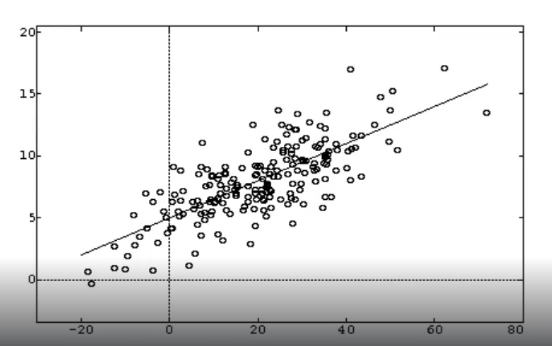

#### 다항 회귀
  - 선형 회귀는 1차원 식을 사용하는데 반해, 다항 회귀는 다항식을 쓰는 모델
  - **곡선**으로 표시됨
image.png

#### 정규화와 회귀 모델
  - overfit: 훈련 데이터에만 딱 맞아, 다른 데이터에서는 적절한 예측이 어려운 경우


---
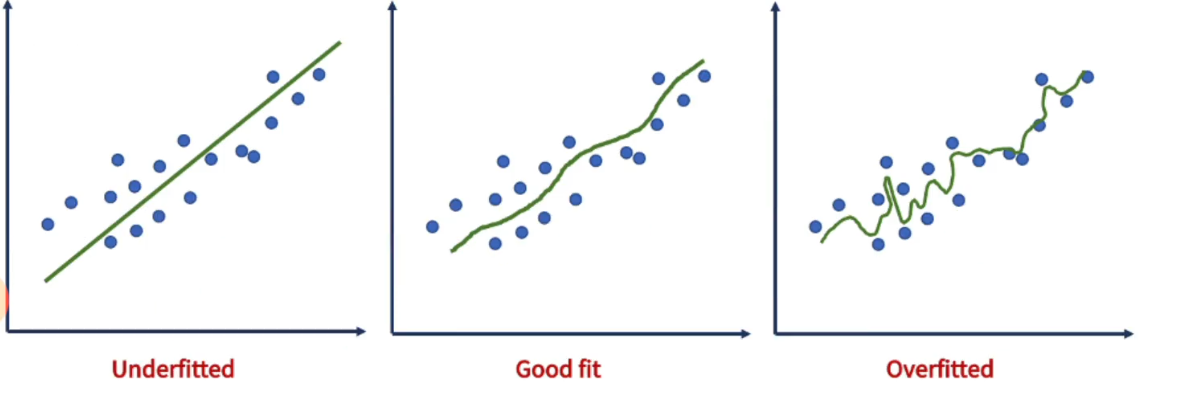


#### 일반적인 overfit 해결 방법
  - 특성 갯수 줄이기: 주요한 특징을 가진 feature만 사용
  - 즉, 복잡성을 줄이는 방법
  

#### L1 & L2 정규화

#### Norm
  - 크기를 계산하는 방법으로, 주로 벡터의 크기를 측정하는데 활용
  - 벡터란, 크기와 방향을 가지고 있는 양을 의미
  - 스칼라란, 크기만 갖고 있을 경우
  - 간단히, 벡터 공간을 2차원 그래프라 생각하고, 이 때의 원소를 백터라고 정의하면, 벡터의 크기를 원점과 벡터 간의 거리로 정의할 수 있음

---
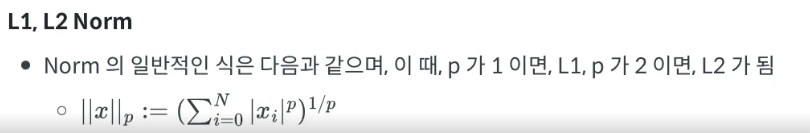


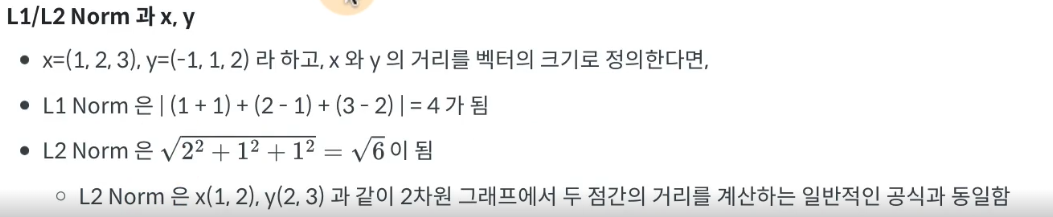

#### L1/L2 Loss 함수
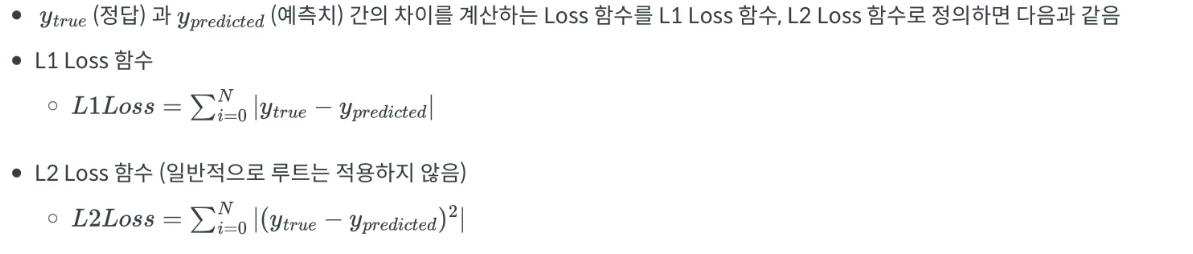

#### L1/L2 Regularization

### L1 Regularzation
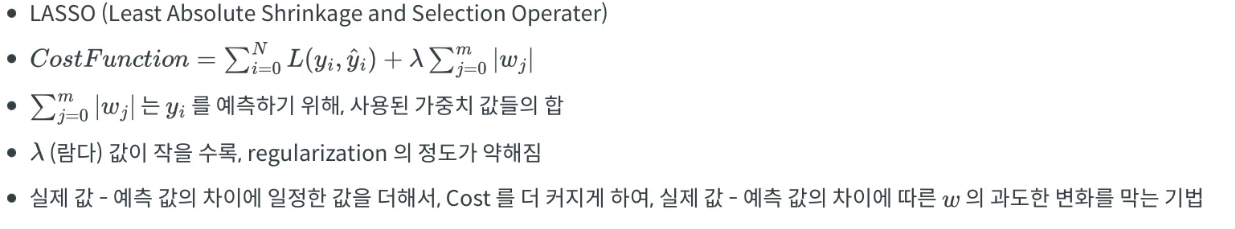

#### 큰 그림 이해
  - 10, 20 , 30 의  평균을 계산하면 30이라는 값에 의해 평균이 민감해짐
  - 각각의 값에 1000 씩 더하면, 1030 이라는 값에 의해 평균이 민감해지지 않음

#### L2 Regularization
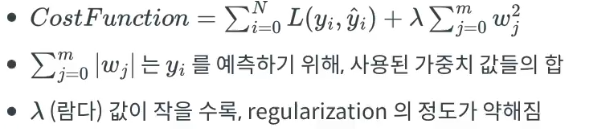

#### 일반적으로 L2 Regularization을 많이 사용함

In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import string
import warnings
import missingno
warnings.filterwarnings('ignore')

#### train, test 데이터 가져오고 합치기

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)

In [4]:
df_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


#### 자전거 공유 플랫폼
  - 도시 곳곳에 설치한 키오스크를 통해, 특정 장소에 빌려 자전거를 타고, 다시 특정 장소에 리턴해놓는 시스템

#### 주요 컬럼(특성)
  - datetime: 연-월-일 시:분:초
  - season:
    - 1: spring
    - 2: summer
    - 3: fall
    - 4: winter
  
  - holiday: 해당 날짜가 공휴일인지 여부(1은 공휴일, 일반적인 주말은 0)
  - workingday: 해당 날짜가 일하는 날인지 여부 (1은 일하는 날)
  - weather:
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain * Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - temp: 절대 온도 (화씨, C)
  - atemp: 체감 온도 (화씨, C)
  - humidity: 상대 습도
  - windspeed: 풍속
  - casual: 등록안한 사람의 대여 횟수
  - registered: 등록자의 대여 횟수
  - count: 총 대여 횟수 (casual + registered)


#### holiday와 workingday의 이해
  - working day 추이를 보면 holiday와 working day를 이해 가능

In [5]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df_train.groupby(pd.Grouper(key='datetime', freq='D')).mean().head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,5.695652,29.130435,34.826087
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,5.454545,55.863636,61.318182
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,4.695652,63.217391,67.913043
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,3.565217,66.000000,69.565217
2011-01-06,1.0,0.0,1.0,1.347826,8.378261,11.660435,51.826087,6.000870,3.826087,66.000000,69.826087
2011-01-07,1.0,0.0,1.0,1.695652,8.057391,10.441957,49.869565,11.304648,6.434783,59.217391,65.652174
2011-01-08,1.0,0.0,0.0,1.708333,6.765000,8.112708,53.583333,17.875879,2.833333,37.125000,39.958333
2011-01-09,1.0,0.0,0.0,1.000000,5.671667,5.808750,43.416667,24.250650,2.250000,32.000000,34.250000


#### train과 test 컬럼 확인
  - test에는 casual, registerd, count가 없음
  - casual + registered = count
  - test 의 count를 예측하는 것이 목표
  - train은 매달 1일 부터 19일, test는 20일부터 마지막날까지

In [6]:
 df_train['dateime_timestamp'] = pd.to_datetime(df_train['datetime'], format='%Y-%m-%d %H:%M:%S')
 df_train['dateime_timestamp'].dt.strftime('%Y-%m-%d').unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
       '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
       '2011-01-17', '2011-01-18', '2011-01-19', '2011-02-01',
       '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
       '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
       '2011-02-18', '2011-02-19', '2011-03-01', '2011-03-02',
       '2011-03-03', '2011-03-04', '2011-03-05', '2011-03-06',
       '2011-03-07', '2011-03-08', '2011-03-09', '2011-03-10',
       '2011-03-11', '2011-03-12', '2011-03-13', '2011-03-14',
       '2011-03-15', '2011-03-16', '2011-03-17', '2011-03-18',
       '2011-03-19', '2011-04-01', '2011-04-02', '2011-04-03',
       '2011-04-04', '2011-04-05', '2011-04-06', '2011-

In [7]:
 df_test['dateime_timestamp'] = pd.to_datetime(df_test['datetime'], format='%Y-%m-%d %H:%M:%S')
 df_test['dateime_timestamp'].dt.strftime('%Y-%m-%d').unique()

array(['2011-01-20', '2011-01-21', '2011-01-22', '2011-01-23',
       '2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
       '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31',
       '2011-02-20', '2011-02-21', '2011-02-22', '2011-02-23',
       '2011-02-24', '2011-02-25', '2011-02-26', '2011-02-27',
       '2011-02-28', '2011-03-20', '2011-03-21', '2011-03-22',
       '2011-03-23', '2011-03-24', '2011-03-25', '2011-03-26',
       '2011-03-27', '2011-03-28', '2011-03-29', '2011-03-30',
       '2011-03-31', '2011-04-20', '2011-04-21', '2011-04-22',
       '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26',
       '2011-04-27', '2011-04-28', '2011-04-29', '2011-04-30',
       '2011-05-20', '2011-05-21', '2011-05-22', '2011-05-23',
       '2011-05-24', '2011-05-25', '2011-05-26', '2011-05-27',
       '2011-05-28', '2011-05-29', '2011-05-30', '2011-05-31',
       '2011-06-20', '2011-06-21', '2011-06-22', '2011-06-23',
       '2011-06-24', '2011-06-25', '2011-06-26', '2011-

#### 결측치 확인(missingno 활용)

<Axes: >

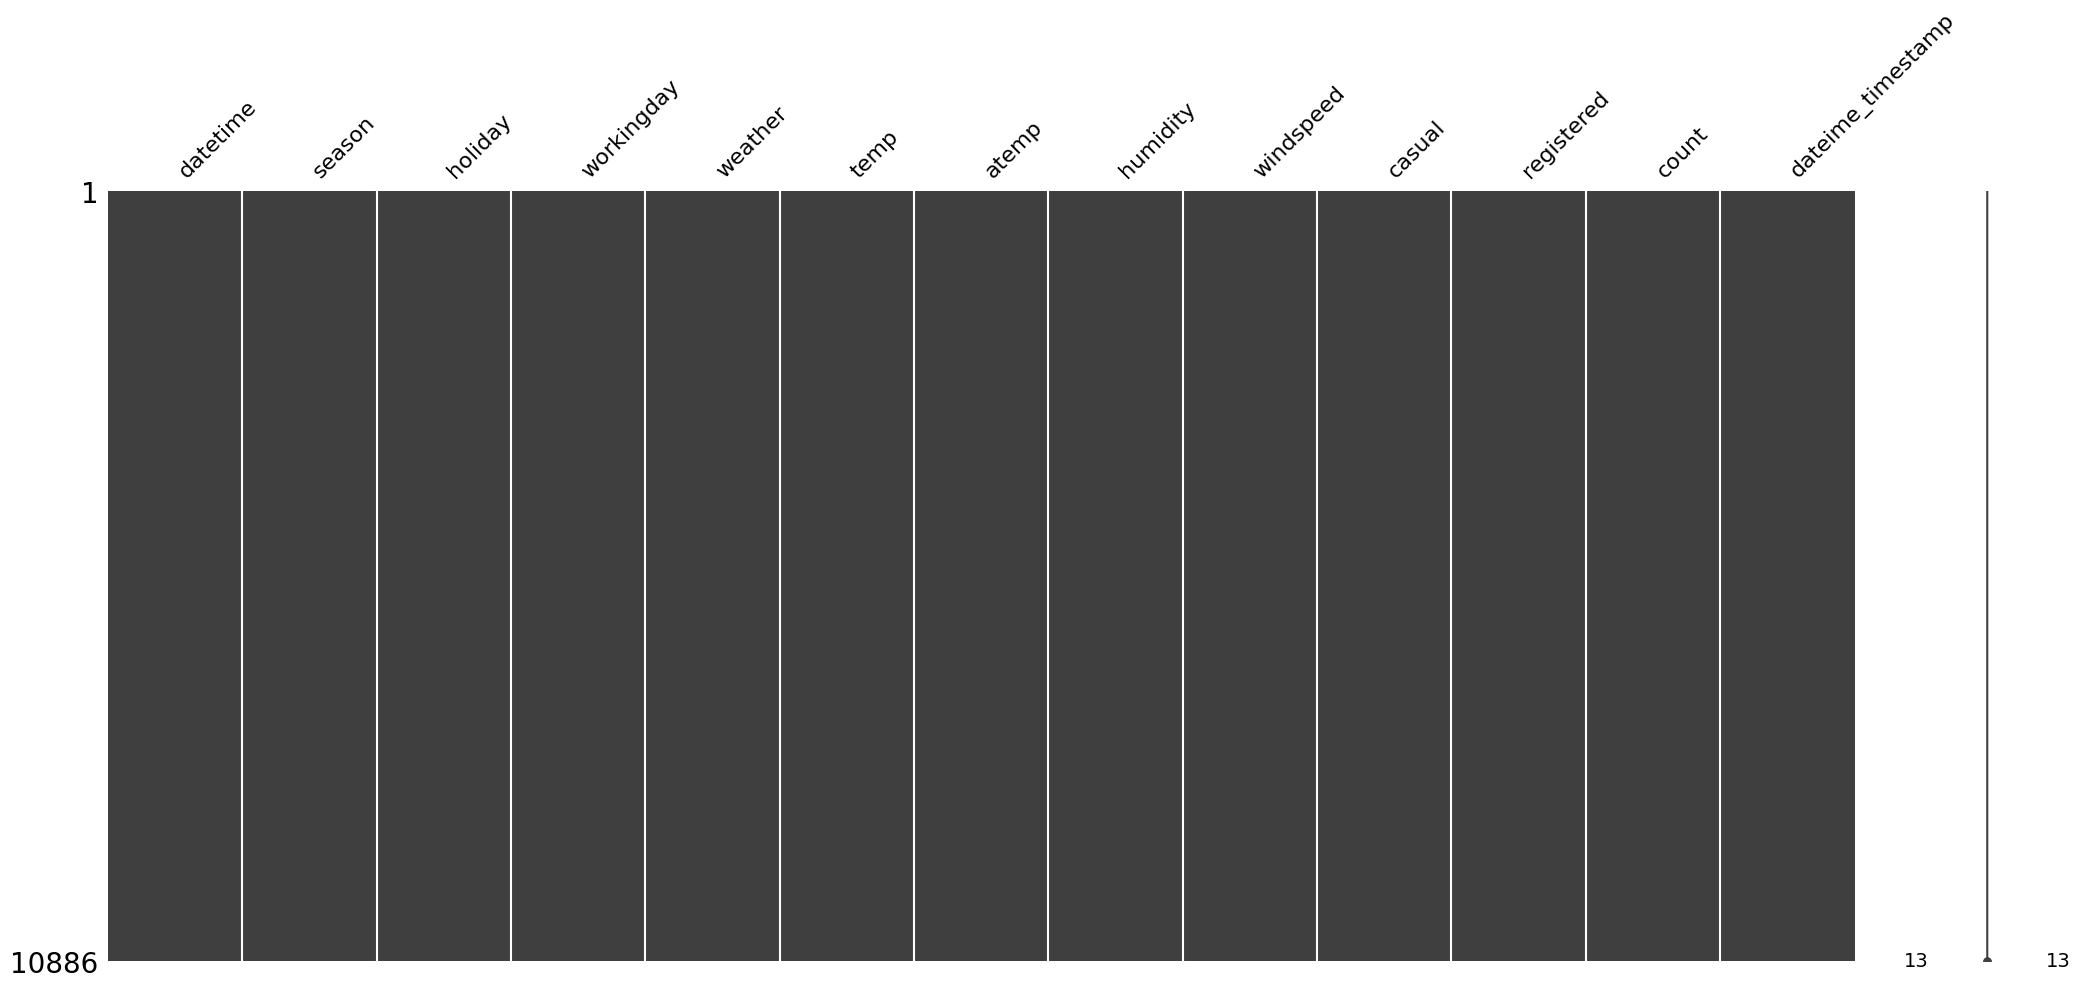

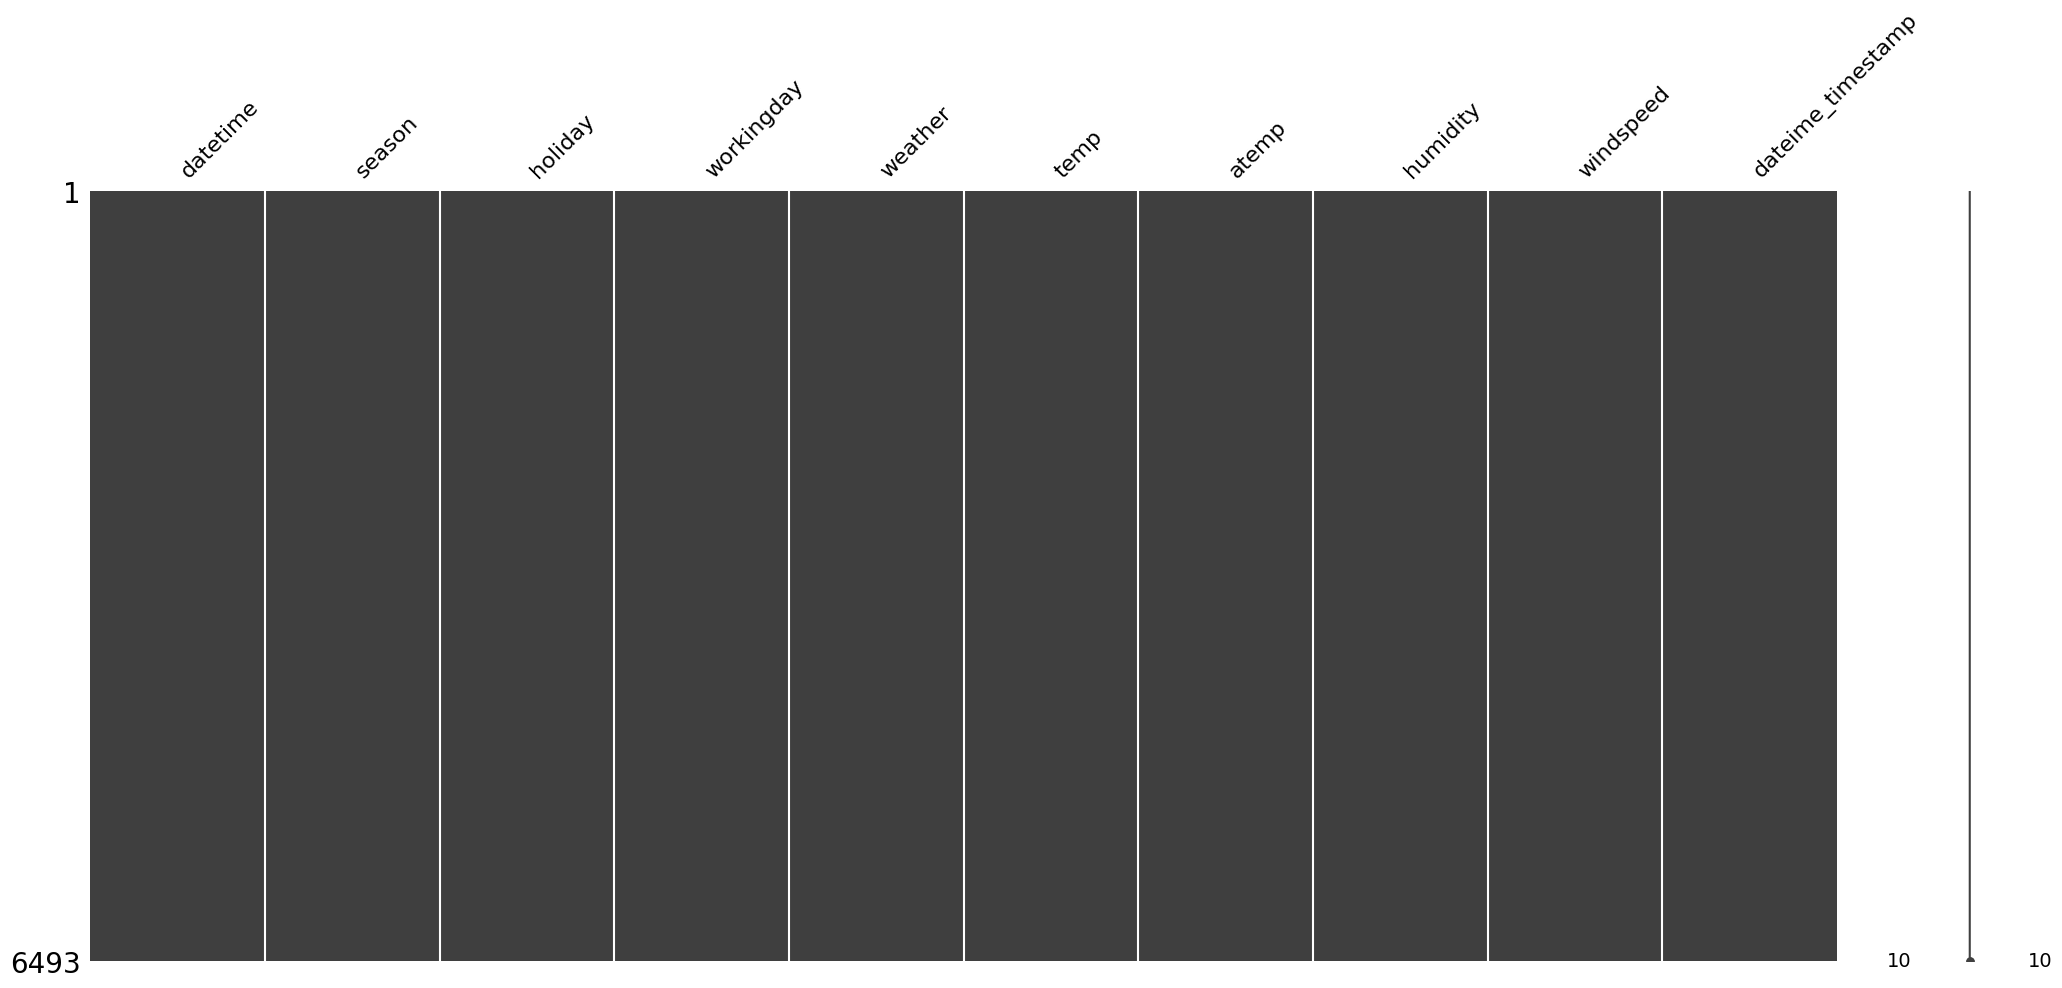

In [8]:
missingno.matrix(df_train)
missingno.matrix(df_test)

In [9]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)

In [10]:
df_train.shape

(10886, 12)

In [11]:
# casual, registered, count 열이 없음
df_test.shape

(6493, 9)

In [12]:
df_train = df_all[:10885]
df_test = df_all[10886:]

In [13]:
def split_df(df):
  return df[:10885], df[10886:]

In [14]:
dt = pd.DatetimeIndex(df_all['datetime'])
df_all.set_index(dt, inplace=True)

df_all['date'] = dt.date
df_all['day'] = dt.day
df_all['month'] = dt.month
df_all['year'] = dt.year
df_all['hour'] = dt.hour
df_all['dow'] = dt.dayofweek
df_all['woy'] = dt.isocalendar().week

In [15]:
df_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,month,year,hour,dow,woy
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,1,1,2011,0,5,52
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,1,2011,1,5,52
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,1,1,2011,2,5,52
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,1,1,2011,3,5,52
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,1,1,2011,4,5,52


#### 성능 평가 지표
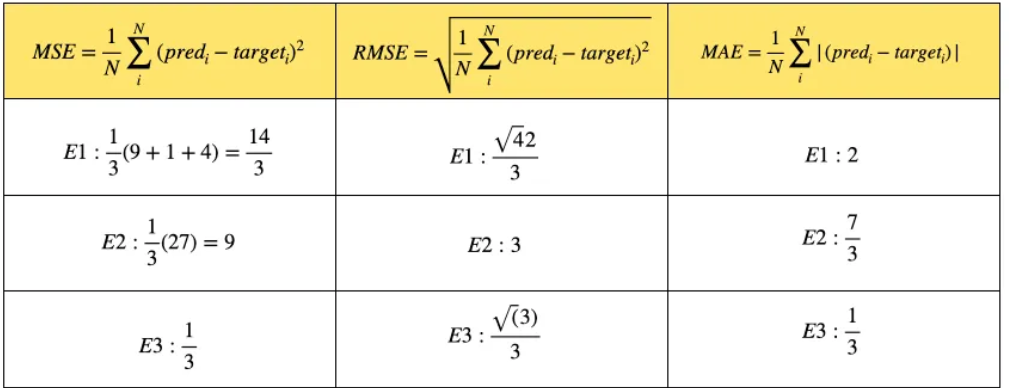

## 회귀 모델의 주요 성능 평가 지표

  - MAE:평균 절대 오차
    - 실제값과 예측값의 차이의 절대값의 평균
  - MSE: 평균 제곱근 오차
    - 실제값과 예측값의 차이를 제곱한 값의 평균
  - RMSE: 평균 제곱근 편차
    - MSE 값은 제곱 값이므로, 실제 오류 평균보다 값이 커지는 특성이 있으므로, 이를 줄이기 위해 MSE에 루트를 씌운 지표
  - RMSLE: 평균 제곱근 대수(log) 오차
    - RMSE에 log를 적용

#### RMSLE

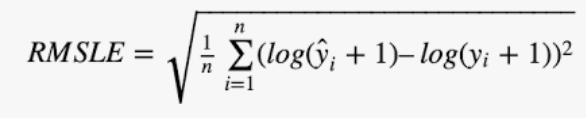

#### RSME VS RMSLE
  1. RMSE는 RSMLE보다 예측값에 특이값이 있으면 변동 폭이 큼
  

#### sklearn의 mean_squared_error

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = [11, 22, 33, 44]
y_true = [10, 20, 30, 40]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_true, y_pred)))

RMSE: 2.7386127875258306
RMSLE: 0.0908921081477642


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = [11, 22, 33, 44]
y_true = [10, 20, 30, 100]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_true, y_pred)))

RMSE: 28.062430400804562
RMSLE: 0.41169893610592656


#### RMSE는 위의 경우처럼 이상값에 변동폭이 큼

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = [110]
y_true = [100]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_true, y_pred)))

RMSE: 10.0
RMSLE: 0.09440968447107423


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = [11000]
y_true = [10000]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_true, y_pred)))

RMSE: 1000.0
RMSLE: 0.09530108976291807


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = [800]
y_true = [1000]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_true, y_pred)))

RMSE: 200.0
RMSLE: 0.22289383224686077


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = [1200]
y_true = [1000]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_true, y_pred)))

RMSE: 200.0
RMSLE: 0.18215504276476313


In [22]:
df_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,month,year,hour,dow,woy
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,1,1,2011,0,5,52
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,1,2011,1,5,52
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,1,1,2011,2,5,52
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,1,1,2011,3,5,52
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,1,1,2011,4,5,52


#### RMSLE: 예측값이 실제값보다 작으면(under estimation) 더 큰 패널티 부여

In [23]:
df_all['casual_log'] = np.log(df_all['casual'] + 1)
df_all['registered_log'] = np.log(df_all['registered'] + 1)
df_all['count_log'] = np.log(df_all['count'] + 1)

#### 타임기반 EDA

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_train, df_test = split_df(df_all)

def visualize(column_name):
    # 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
    # 이를 위해 ['count'] 에 대해서만 sum() 을 수행하도록 변경
    # 기존 코드
    # df_train_workingday_time = df_train.groupby(['workingday', column_name]).sum()
    # df_train_workingday_time = df_train_workingday_time.reset_index()
    df_train_workingday_time = df_train.groupby(['workingday', column_name])['count'].sum().reset_index()

    times_nonworkday = df_train_workingday_time[df_train_workingday_time['workingday'] == 0][column_name]
    counts_nonworkday = df_train_workingday_time[df_train_workingday_time['workingday'] == 0]['count']

    times_workday = df_train_workingday_time[df_train_workingday_time['workingday'] == 1][column_name]
    counts_workday = df_train_workingday_time[df_train_workingday_time['workingday'] == 1]['count']

    df_temp_workday = pd.concat([times_workday, counts_workday], axis=1, keys=[column_name, 'count'])
    df_temp_nonworkday = pd.concat([times_nonworkday, counts_nonworkday], axis=1, keys=[column_name, 'count'])

    fig = make_subplots(rows=1, cols=2, subplot_titles=("workday", "non-workday"))
    fig.add_trace(
        go.Bar( x=df_temp_workday[column_name], y=df_temp_workday['count'], text=df_temp_workday['count'], textposition='auto', texttemplate='%{text:.0f}' ),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar( x=df_temp_nonworkday[column_name], y=df_temp_nonworkday['count'], text=df_temp_nonworkday['count'], textposition='auto', texttemplate='%{text:.0f}' ),
        row=1, col=2
    )
    fig.update_layout(showlegend=False)
    fig.show()

In [25]:
df_all['date'] = dt.date
df_all['day'] = dt.day
df_all['month'] = dt.month
df_all['year'] = dt.year
df_all['hour'] = dt.hour
df_all['dow'] = dt.dayofweek

# 202502 업데이트: 최신 라이브러리에서는 weekofyear 가 지원되지 않음
# 기존 코드: df_all['woy'] = dt.weekofyear
df_all['woy'] = dt.isocalendar().week

#### 연도별 EDA
   - 휴일 구분 없이 시간이 지날수록 사용량 증가

In [26]:
visualize('year')

#### 월별 이용량
   - 추울 때 (겨울)일 때 사용량이 상대적으로 적은 경향이 있음

In [27]:
visualize('month')

#### 일별 사용량
   - 유의미한 경향성 확인 어려움

In [28]:
visualize('day')

In [29]:
visualize('dow')

#### 주별 사용량 변화
   - 트렌드가 잘 보이지 않지만 겨울철에 상대적으로 사용량 적음

In [30]:
visualize('woy')

#### 시간별 사용량
   - 평일에는 출퇴근 시간에 사용량 급격하게 증가
   - 휴일에는 밤에도 사용량이 어느정도 존재

In [31]:
visualize('hour')

In [32]:
df_train, df_test = split_df(df_all)

# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 이를 위해 ['count'] 에 대해서만 sum() 을 수행하도록 변경
# 기존 코드
# df_train_workingday_hour = df_train.groupby(['workingday', 'hour']).sum()
# df_train_workingday_hour = df_train_workingday_hour.reset_index()
df_train_workingday_hour = df_train.groupby(['workingday', 'hour'])['count'].sum().reset_index()

hours_nonworkday = df_train_workingday_hour[df_train_workingday_hour['workingday'] == 0]['hour']
counts_nonworkday = df_train_workingday_hour[df_train_workingday_hour['workingday'] == 0]['count']

hours_workday = df_train_workingday_hour[df_train_workingday_hour['workingday'] == 1]['hour']
counts_workday = df_train_workingday_hour[df_train_workingday_hour['workingday'] == 1]['count']

df_temp_workday = pd.concat([hours_workday, counts_workday], axis=1, keys=['hour', 'count'])
df_temp_nonworkday = pd.concat([hours_nonworkday, counts_nonworkday], axis=1, keys=['hour', 'count'])

In [33]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar( x=df_temp_workday['hour'], y=df_temp_workday['count'], text=df_temp_workday['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>workday</b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'ggplot2'
})
fig.show()

fig = go.Figure()
fig.add_trace(
    go.Bar( x=df_temp_nonworkday['hour'], y=df_temp_nonworkday['count'], text=df_temp_nonworkday['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>non-workday</b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'seaborn'
})
fig.show()

#### workday peak time: 8, 17~18
#### non-workday peak time: 10: 19

In [34]:
def func(df_data):
    if df_data['workingday'] == 1:
        if (df_data['hour'] == 8) or (df_data['hour'] >= 17 and df_data['hour'] <= 18):
            return 1
    else:
        if (df_data['hour'] >= 10 and df_data['hour'] <= 19):
            return 1
    return 0

# 0 or ‘index’: 각 컬럼에 함수 적용, 1 or ‘columns’: 각 행에 함수 적용
df_all['peak'] = df_all.apply(func, axis=1)

#### 상관관계 분석

In [35]:
df_train, df_test = split_df(df_all)

In [36]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'day', 'month', 'year', 'hour', 'dow', 'woy', 'casual_log',
       'registered_log', 'count_log', 'peak'],
      dtype='object')

In [37]:
df_train_corr = df_train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [39]:
import plotly.graph_objects as go
import numpy as np

# df_train_corr로부터 상관계수 행렬 계산
corr_matrix = df_train_corr.corr()

# 각 셀에 표시할 상관관계 값 (소수점 둘째자리)
text_values = np.round(corr_matrix.values, 2)

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Blues',   # 파란 계통 컬러 스케일 사용
    zmin=-1,              # 컬러바 범위 -1부터
    zmax=1,               # 컬러바 범위 1까지
    text=text_values,     # 셀에 표시할 텍스트 값
    texttemplate="%{text}"  # 텍스트 포맷 설정

))

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Variables",
    yaxis_title="Variables"
)

fig.show()

#### 온도, 풍속, 습도 분석

#### 풍속

In [40]:
df_all.loc[ df_all['windspeed'] <= 5, 'windspeed_category'] = 0
df_all.loc[(df_all['windspeed'] > 5) & (df_all['windspeed'] <= 10), 'windspeed_category'] = 1
df_all.loc[(df_all['windspeed'] > 10) & (df_all['windspeed'] <= 15), 'windspeed_category'] = 2
df_all.loc[(df_all['windspeed'] > 15) & (df_all['windspeed'] <= 20), 'windspeed_category'] = 3
df_all.loc[(df_all['windspeed'] > 20) & (df_all['windspeed'] <= 25), 'windspeed_category'] = 4
df_all.loc[(df_all['windspeed'] > 25) & (df_all['windspeed'] <= 30), 'windspeed_category'] = 5
df_all.loc[(df_all['windspeed'] > 30) & (df_all['windspeed'] <= 35), 'windspeed_category'] = 6
df_all.loc[(df_all['windspeed'] > 35) & (df_all['windspeed'] <= 40), 'windspeed_category'] = 7
df_all.loc[(df_all['windspeed'] > 35) & (df_all['windspeed'] <= 40), 'windspeed_category'] = 8
df_all.loc[(df_all['windspeed'] > 40) & (df_all['windspeed'] <= 45), 'windspeed_category'] = 9
df_all.loc[(df_all['windspeed'] > 45) & (df_all['windspeed'] <= 50), 'windspeed_category'] = 10
df_all.loc[ df_all['windspeed'] > 50, 'windspeed_category'] = 11

In [41]:
# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 이를 위해 ['count'] 에 대해서만 sum() 을 수행하도록 변경
# 기존 코드: df_temp_count = df_all.groupby('windspeed_category').sum()
df_temp_count = df_all.groupby('windspeed_category')['count'].sum().reset_index()

In [42]:
fig = go.Figure()
fig.add_trace(
    go.Bar( x=df_temp_count.index, y=df_temp_count['count'], text=df_temp_count['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>windspeed VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'ggplot2'
})
fig.show()

- 풍속 5 ~ 25 정도일 때 자전거를 많이 이용함


#### 온도

In [43]:
df_all['temp'].describe()

,temp
count,17379.000000
mean,20.376474
std,7.894801
min,0.820000
25%,13.940000
50%,20.500000
75%,27.060000
max,41.000000


#### 최저 0도에서 최대 41도

In [44]:
df_all.loc[ df_all['temp'] <= 5, 'temp_category'] = 0
df_all.loc[(df_all['temp'] > 5) & (df_all['temp'] <= 10), 'temp_category'] = 1
df_all.loc[(df_all['temp'] > 10) & (df_all['temp'] <= 15), 'temp_category'] = 2
df_all.loc[(df_all['temp'] > 15) & (df_all['temp'] <= 20), 'temp_category'] = 3
df_all.loc[(df_all['temp'] > 20) & (df_all['temp'] <= 25), 'temp_category'] = 4
df_all.loc[(df_all['temp'] > 25) & (df_all['temp'] <= 30), 'temp_category'] = 5
df_all.loc[(df_all['temp'] > 30) & (df_all['temp'] <= 35), 'temp_category'] = 6
df_all.loc[(df_all['temp'] > 35) & (df_all['temp'] <= 40), 'temp_category'] = 7
df_all.loc[ df_all['temp'] > 40, 'temp_category'] = 8

In [45]:
# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 이를 위해 ['count'] 에 대해서만 sum() 을 수행하도록 변경
# 기존 코드: df_temp_count = df_all.groupby('temp_category').sum()
df_temp_count = df_all.groupby('temp_category')['count'].sum().reset_index()

In [46]:
fig = go.Figure()
fig.add_trace(
    go.Bar( x=df_temp_count.index, y=df_temp_count['count'], text=df_temp_count['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>temperature VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'ggplot2'
})
fig.show()

- 10 ~ 35도 일때 많이 이용함
- 10도 미만, 그리고 35도 초과할 경우 이용량 급격하게 감소

#### 습도

In [47]:
df_all['humidity'].describe()

,humidity
count,17379.000000
mean,62.722884
std,19.292983
min,0.000000
25%,48.000000
50%,63.000000
75%,78.000000
max,100.000000


In [48]:
df_all.loc[ df_all['humidity'] <= 10, 'humidity_category'] = 0
df_all.loc[(df_all['humidity'] > 10) & (df_all['humidity'] <= 20), 'humidity_category'] = 1
df_all.loc[(df_all['humidity'] > 20) & (df_all['humidity'] <= 30), 'humidity_category'] = 2
df_all.loc[(df_all['humidity'] > 30) & (df_all['humidity'] <= 40), 'humidity_category'] = 3
df_all.loc[(df_all['humidity'] > 40) & (df_all['humidity'] <= 50), 'humidity_category'] = 4
df_all.loc[(df_all['humidity'] > 50) & (df_all['humidity'] <= 60), 'humidity_category'] = 5
df_all.loc[(df_all['humidity'] > 60) & (df_all['humidity'] <= 70), 'humidity_category'] = 6
df_all.loc[(df_all['humidity'] > 70) & (df_all['humidity'] <= 80), 'humidity_category'] = 7
df_all.loc[(df_all['humidity'] > 80) & (df_all['humidity'] <= 90), 'humidity_category'] = 8
df_all.loc[ df_all['humidity'] > 90, 'humidity_category'] = 9

In [49]:
# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 이를 위해 ['count'] 에 대해서만 sum() 을 수행하도록 변경
# 기존 코드: df_temp_count = df_all.groupby('humidity_category').sum()
df_temp_count = df_all.groupby('humidity_category')['count'].sum().reset_index()

In [50]:
fig = go.Figure()
fig.add_trace(
    go.Bar( x=df_temp_count.index, y=df_temp_count['count'], text=df_temp_count['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>humidity VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'ggplot2'
})
fig.show()

#### 습도가 20~ 60까지 많이 이용

#### 습도가 높아도 출퇴근 용으로 사용할 경우 상관관계가 약해지지 않을지 확인

In [51]:
# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 기존 코드: df_temp_count = df_all.groupby(['workingday', 'humidity_category']).sum()
# 숫자형 데이터 컬럼 필터링 방법
# select_dtypes(): 특정 데이터 타입의 열만 선택하는 pandas 메서드 (include=[np.number]: 숫자 타입의 열만 포함)
df_numeric = df_all.select_dtypes(include=[np.number])  # numpy 라이브러리가 필요
df_temp_count = df_numeric.groupby(['workingday', 'humidity_category']).sum()

In [52]:
df_temp_count.head()

season  holiday  weather      temp      atemp  \
workingday humidity_category                                                  
0          1.0                    61        0       37    838.04    965.140   
           2.0                   375        6      214   4155.76   4691.600   
           3.0                  1309       61      646  11967.08  13737.000   
           4.0                  2024       99     1051  16404.92  19003.695   
           5.0                  2122       72     1062  17156.86  20199.170   

                              humidity   windspeed   casual  registered  \
workingday humidity_category                                              
0          1.0                     635    982.0123   3517.0      4371.0   
           2.0                    5262   3207.0086  14417.0     23627.0   
           3.0                   21367   9924.0668  42595.0     79809.0   
           4.0                   39667  13931.2363  43306.0     90169.0   
           5.0                   48199  11017.1986  34723.0     74218.0   

                                 count  ...     year   hour   dow    woy  \
workingday humidity_category            ...                                
0          1.0                  7888.0  ...    74421    475   191    481   
           2.0                 38044.0  ...   388243   2812  1029   3264   
           3.0                122404.0  ...  1186835   8736  2967  13288   
           4.0                133475.0  ...  1766129  11309  4332  22019   
           5.0                108941.0  ...  1745966   9969  4462  23413   

                               casual_log  registered_log    count_log  peak  \
workingday humidity_category                                                   
0          1.0                 126.758155      146.543822   161.855742    23   
           2.0                 513.380344      606.676418   655.296059   164   
           3.0                1549.459616     1943.014073  2078.057068   478   
           4.0                1885.134919     2519.266130  2681.101783   516   
           5.0                1787.391721     2427.205710  2584.533371   340   

                              windspeed_category  temp_category  
workingday humidity_category                                     
0          1.0                             188.0          150.0  
           2.0                             561.0          726.0  
           3.0                            1754.0         2095.0  
           4.0                            2425.0         2836.0  
           5.0                            1858.0         2983.0  

[5 rows x 22 columns]

In [54]:
df_temp_count.loc[0]['count']

,count
humidity_category,
1.0,7888.0
2.0,38044.0
3.0,122404.0
4.0,133475.0
5.0,108941.0
6.0,104212.0
7.0,69553.0
8.0,58329.0
9.0,12026.0


In [55]:
df_temp_count.loc[1]['count']

,count
humidity_category,
0.0,807.0
1.0,5375.0
2.0,85886.0
3.0,207078.0
4.0,276520.0
5.0,267081.0
6.0,240042.0
7.0,165448.0
8.0,140894.0


#### working day & humidity 복합분석

In [56]:
fig = go.Figure()

fig.add_trace(
    go.Bar( x=df_temp_count.loc[0].index, y=df_temp_count.loc[0]['count'], name="non-workingday" )
)
fig.add_trace(
    go.Bar( x=df_temp_count.loc[1].index, y=df_temp_count.loc[1]['count'], name="workingday" )
)

fig.update_layout({
        "title": { "text": "<b>humidity & workingday VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "barmode": "stack",
        "template":'ggplot2'
})
fig.show()

In [57]:
# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 기존 코드: df_temp_count = df_all.groupby(['temp_category', 'windspeed_category']).sum()
# 숫자형 데이터 컬럼 필터링 방법
# select_dtypes(): 특정 데이터 타입의 열만 선택하는 pandas 메서드 (include=[np.number]: 숫자 타입의 열만 포함)
df_numeric = df_all.select_dtypes(include=[np.number])  # numpy 라이브러리가 필요
df_temp_count = df_numeric.groupby(['temp_category', 'windspeed_category']).sum()

In [58]:
df_temp_count['count']

temp_category  windspeed_category
0.0            0.0                    853.0
               1.0                   2213.0
               2.0                   1538.0
               3.0                   1149.0
               4.0                    495.0
                                      ...  
7.0            4.0                   4019.0
               5.0                   2660.0
               6.0                   1432.0
               8.0                    941.0
8.0            2.0                    294.0
Name: count, Length: 80, dtype: float64

In [59]:
df_temp_count.loc[0].index

Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0], dtype='float64', name='windspeed_category')

In [60]:
df_temp_count.loc[0]['count']

,count
windspeed_category,
0.0,853.0
1.0,2213.0
2.0,1538.0
3.0,1149.0
4.0,495.0
5.0,473.0
6.0,89.0
8.0,46.0
10.0,15.0


In [61]:
fig = go.Figure()


fig.add_trace(
    go.Bar( x=df_temp_count.loc[0].index, y=df_temp_count.loc[0]['count'], name="temperature " + str(0) )
)
fig.add_trace(
    go.Bar( x=df_temp_count.loc[1].index, y=df_temp_count.loc[1]['count'], name="temperature " + str(1) )
)

fig.update_layout({
        "title": { "text": "<b>temperature & windspeed VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1", "title": "windspeed" },
        "barmode": "stack",
        "template":'ggplot2'
})
fig.show()

In [62]:
fig = go.Figure()

for index in range(9):
    fig.add_trace(
        go.Bar( x=df_temp_count.loc[index].index, y=df_temp_count.loc[index]['count'], name="temperature " + str(index) )
    )

fig.update_layout({
        "title": { "text": "<b>temperature & windspeed VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1", "title": "windspeed" },
        "barmode": "stack",
        "template":'ggplot2'
})
fig.show()

In [64]:
# 202502 업데이트: sum() 메서드 사용시 데이터프레임이 숫자형 데이터 컬럼으로만 구성되어야 함
# 기존 코드: df_temp_count = df_all.groupby(['temp_category', 'humidity_category']).sum()
# 숫자형 데이터 컬럼 필터링 방법
# select_dtypes(): 특정 데이터 타입의 열만 선택하는 pandas 메서드 (include=[np.number]: 숫자 타입의 열만 포함)
df_numeric = df_all.select_dtypes(include=[np.number])  # numpy 라이브러리가 필요
df_temp_count = df_numeric.groupby(['temp_category', 'humidity_category']).sum()

In [65]:
fig = go.Figure()

for index in range(9):
    fig.add_trace(
        go.Bar( x=df_temp_count.loc[index].index, y=df_temp_count.loc[index]['count'], name="temperature " + str(index) )
    )

fig.update_layout({
        "title": { "text": "<b>temperature & humidity VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "barmode": "stack",
        "template":'ggplot2'
})
fig.show()

- 온도가 높고 습도가 모두 높은 경우 이용량이 줄음